# 邏輯回歸二分類實作

## Step 1: 導入所需的套件

In [135]:
## 導入Python的數據處理套件
import numpy as np
import pandas as pd
## 導入視覺化套件
import matplotlib.pyplot as plt
import seaborn as sns

## 導入Sklearn中的KNN模組
from sklearn.linear_model import LogisticRegression

## 導入Sklearn標準化模組
from sklearn.preprocessing import StandardScaler

## 將數據集分成訓練集與測試集的套件
from sklearn.model_selection import train_test_split

## 導入Sklearn中的metrics 評估模型性能指標
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix

## Step 2: 導入數據集

In [138]:
## 導入數據集
data = pd.read_csv('b_depressed.csv')
'''
Survey_id：            個人識別ID
Ville_id：             村莊識別ID
sex：                  性別(0=女, 1=男)    (分類變數)
Age：                  年齡
Married：              結婚(0=無, 1=有)    (分類變數)
Number_children：      子女個數
education_level：      教育程度            (分類變數)
total_members：        家同成員總數
gained_asset：         獲得資產
durable_asset：        耐久資產
save_asset：           存款
living_expenses：      生活費
other_expenses：       其他費用
incoming_salary：      收入來源_薪水       (分類變數)
incoming_own_farm：    收入來源_自己的農場 (分類變數)
incoming_business：    收入來源_業務收入   (分類變數)
incoming_no_business： 收入來源_非業務收入 (分類變數)
incoming_agricultural：收入來源_農業經營   
farm_expenses：        農場費用
labor_primary：        初級勞動            (分類變數)
lasting_investment：   長期投資
no_lasting_investmen： 非長期投資
depressed：            是否憂鬱            (分類變數)
'''
## 顯示數據集
data


,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


## Step 3: 檢查缺失值

<Axes: >

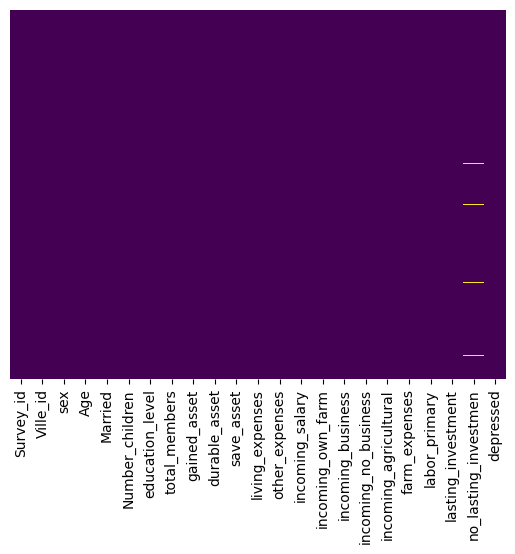

In [139]:
## 用熱點圖，圖像化觀察
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [140]:
## 用數字顯示缺失量 共20筆在no_lasting_investmen
data.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

## Step 4: 處理缺失值

<Axes: >

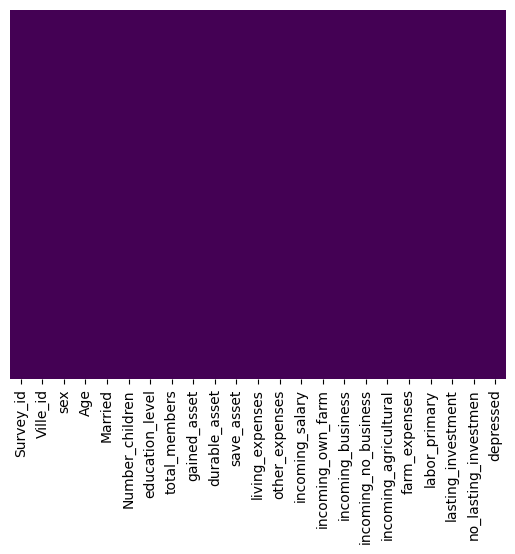

In [141]:
#因缺失資料只有20筆，小於整體dataset 5%，故選擇移除
data.dropna(inplace=True)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [142]:
data.isnull().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

## Step 5: 製圖觀察特徵

<Axes: xlabel='sex', ylabel='count'>

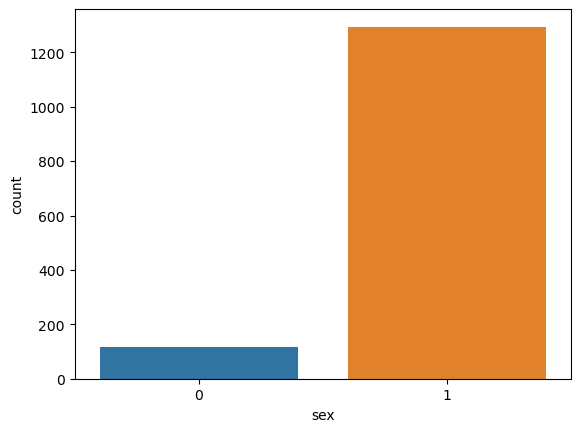

In [143]:
#看受訪者男女數量   男性數量比較多。
sns.countplot(x='sex', hue='sex',data=data,legend=False)

<Axes: xlabel='Age', ylabel='Count'>

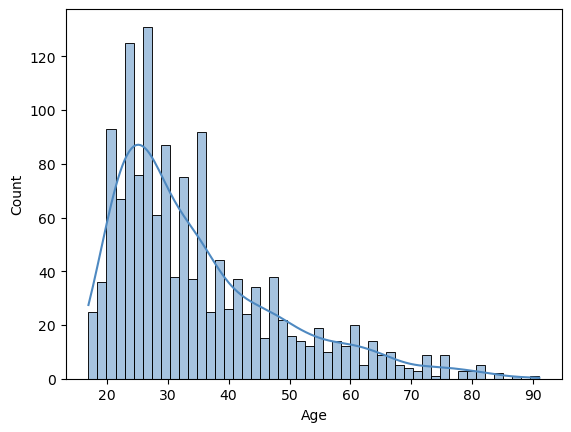

In [144]:
#看年齡散佈圖  20~30歲受訪者數量最多
sns.histplot(data['Age'],kde=True,bins=50,color='#4E89C1')

<Axes: xlabel='Number_children', ylabel='count'>

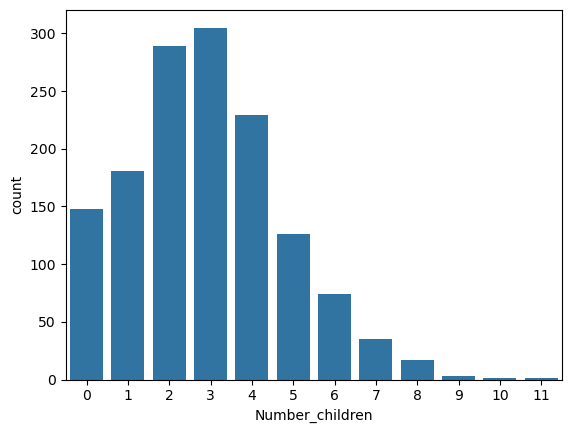

In [145]:
#看受訪者子女個數   農村很多人生3個小孩
sns.countplot(x='Number_children',data=data, )

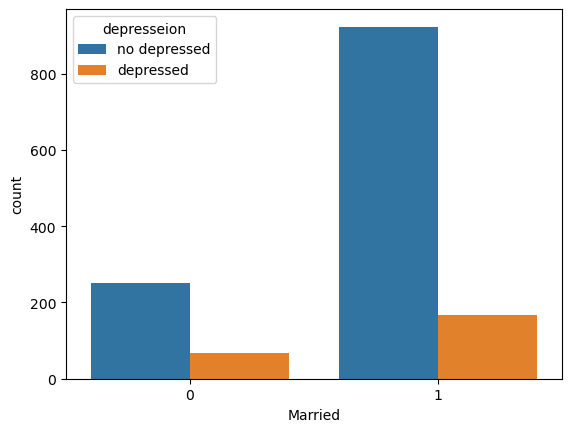

In [146]:
#看結婚是否影響憂鬱症？   無論有無結婚，非憂鬱人數皆較高。
sns.countplot(x='Married',hue='depressed',data=data)
plt.legend(title='depresseion', labels=['no depressed', 'depressed'])

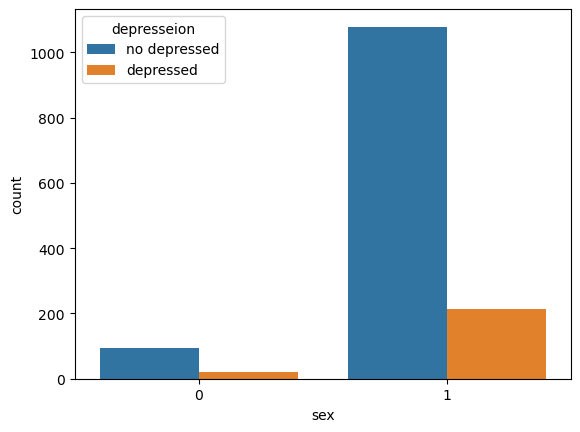

In [147]:
#看性別是否影響憂鬱症？   無論男女，非憂鬱人數皆較高。
sns.countplot(x='sex',hue='depressed',data=data)
plt.legend(title='depresseion', labels=['no depressed', 'depressed'])

<Axes: xlabel='depressed', ylabel='living_expenses'>

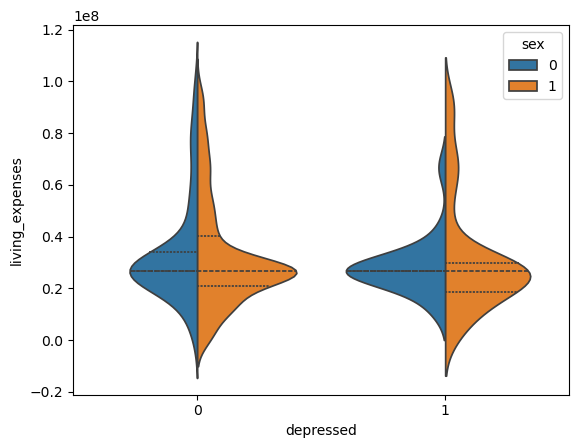

In [148]:
#看生活費與性別對於憂鬱症的相關度 無論有無憂鬱或性別，生活費差不多。但男性生活費四分位距較大，女性憂鬱者生活費較集中
sns.violinplot(x='depressed', y='living_expenses', hue='sex',data=data,split=True, inner='quartile')

## Step 6: 數據整理，以及標準化

In [149]:
#刪除無用資，如個人ID與村莊ID
data.drop(['Survey_id','Ville_id'],axis=1,inplace=True)
data

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,25,1,1,7,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,1,28,1,4,10,6,15711078,24023054,15506558,10476722,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,1,66,0,0,1,1,42440731,22861940,22562605,12545372,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,1,51,1,1,12,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [152]:
#因dataset特徵具有不同的量級，進行數據標準化

#選擇Standardization，因數據具有常態分佈性
scaler = StandardScaler()

#而需要Standardization為「連續變量」，在開頭dataset有做註記
columns_to_standardize = ['Age', 'Number_children', 'total_members', 'gained_asset', 
                          'durable_asset', 'save_asset', 'living_expenses','other_expenses',
#                         'incoming_agricultural','farm_expenses','lasting_investment','no_lasting_investmen']

# 對選定的列進行標準化
#data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

In [153]:
data.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


## Step 7: 自訂自變量和應變量

In [154]:
#建立feature資料集
X = data.drop(['depressed'],axis=1)

#建立target資料集
y = data['depressed']

## Step 8: 切割數據train set與test set

In [155]:
#Train與test為80%:20%，並且使用種子碼固定劃分
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(1127, 20)
(1127,)
(282, 20)
(282,)


## Step 9: 建立訓練組邏輯迴歸模型 

In [156]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [157]:
predictions_train = logmodel.predict(X_train)
predictions_test = logmodel.predict(X_test)

## Step 10: 模型表現：計算accuracy及結果顯示

In [158]:
#列出train與test預測錯誤的index
error_index_train = np.where(predictions_train!=y_train.values)[0]
error_index_test = np.where(predictions_test!=y_test.values)[0]
print(error_index_train)
print(error_index_test)

[   3    9   10   12   14   21   38   46   48   51   59   61   65   74
   95   99  107  109  119  121  122  138  143  151  166  169  170  174
  178  185  187  198  203  212  219  220  221  228  233  236  248  250
  251  252  256  259  260  283  287  289  299  302  310  317  323  324
  325  326  334  339  348  358  360  361  367  370  371  373  378  381
  393  398  400  412  415  421  427  433  437  441  449  454  455  470
  490  491  500  502  506  512  517  525  528  530  533  535  540  545
  551  554  555  557  572  573  598  601  603  614  626  632  633  636
  648  651  655  664  669  677  678  679  680  682  683  689  694  701
  719  732  765  766  767  782  814  815  823  839  843  845  851  853
  858  868  886  891  902  903  904  906  907  912  915  921  930  931
  934  938  939  941  944  951  952  957  961  971  976  981  982  987
  990  994  998  999 1002 1003 1010 1013 1019 1023 1034 1047 1051 1057
 1068 1069 1074 1077 1081 1082 1084 1093 1100 1101 1102 1116]
[  2   4   6   

In [159]:
#利用metrics評估模型性能指標
acc_test = accuracy_score(y_test,predictions_test)
prec_test = precision_score(y_test, predictions_test,zero_division=1)
rec_test = recall_score(y_test,predictions_test)
f1_test = f1_score(y_test,predictions_test)
results_test = pd.DataFrame([['Logistic Regression(test)', acc_test,prec_test,rec_test,f1_test]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])

acc_train = accuracy_score(y_train,predictions_train)
prec_train = precision_score(y_train, predictions_train,zero_division=1)
rec_train = recall_score(y_train,predictions_train)
f1_train = f1_score(y_train,predictions_train)
results_train = pd.DataFrame([['Logistic Regression(train)', acc_train,prec_train,rec_train,f1_train]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])

results = pd.concat([results_train,results_test])
print(results)

                        Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression(train)  0.827862        1.0     0.0       0.0
0   Logistic Regression(test)  0.854610        1.0     0.0       0.0


In [160]:
#列出錯誤位置與資訊
print('error_index:',error_index_test)
print('miss classification :',predictions_test[error_index_test])#錯誤答案
data_index=data.iloc[error_index_test].index#這裡變數train是所有資料
data.iloc[data_index]#錯誤欄位的正確之原始資料

error_index: [  2   4   6   7  15  17  30  36  46  51  53  69  75  77  79 101 119 125
 126 129 141 152 156 161 166 169 173 181 185 191 199 201 211 214 224 236
 238 242 247 260 273]
miss classification : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
6,0,34,0,1,9,3,41303144,21925041,23399979,66730708,...,0,0,0,0,26692283,22243569,0,22562288,55608922.0,1
7,1,21,1,2,10,4,12013633,20323505,48046108,80076849,...,0,0,1,0,9275569,36979933,0,33922659,54600174.0,0
15,1,24,1,2,10,5,1108353,12219727,1601537,38169963,...,0,1,0,0,21353827,37814063,0,23991919,48624439.0,0
17,1,44,1,5,12,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
30,1,27,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
36,1,27,1,3,10,5,28912201,68065323,23399979,28694205,...,1,0,0,0,28827665,10409991,1,68065323,30429201.0,0
46,1,26,1,1,8,3,22375139,17616907,23399979,13346142,...,1,0,0,1,28026898,42040348,1,21616112,15250636.0,0
53,1,53,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


## Step 11: 模型係數與截距

In [129]:
#模型係數與截距
logmodel_coef = logmodel.coef_
logmodel_intercept = logmodel.intercept_
print('Coefficients: ',logmodel_coef)
print('Interception: ',logmodel_intercept)

#模型係數排序
coef_series = pd.Series(logmodel_coef.ravel(), index=X.columns)
sorted_coef_series = coef_series.sort_values(ascending=False)
print(sorted_coef_series)

Coefficients:  [[-0.10481864  0.1903417  -0.17600756  0.02659549 -0.06401092  0.1613156
  -0.06328565  0.10444879  0.06592362 -0.05711515  0.00360857  0.06773453
  -0.14961595 -0.28352627  0.06269335 -0.08658872 -0.05237144 -0.18941462
   0.01056129  0.10103748]]
Interception:  [-0.76130398]
Age                      0.190342
total_members            0.161316
durable_asset            0.104449
no_lasting_investmen     0.101037
incoming_salary          0.067735
save_asset               0.065924
incoming_no_business     0.062693
Number_children          0.026595
lasting_investment       0.010561
other_expenses           0.003609
farm_expenses           -0.052371
living_expenses         -0.057115
gained_asset            -0.063286
education_level         -0.064011
incoming_agricultural   -0.086589
sex                     -0.104819
incoming_own_farm       -0.149616
Married                 -0.176008
labor_primary           -0.189415
incoming_business       -0.283526
dtype: float64


## Step 12: 給予任意值，觀察模型預測結果

In [130]:
#挑各Features的最大跟最小當任意值
max_values = data.max()
min_values = data.min()
fake_df = pd.DataFrame([max_values, min_values])
fake_df_test = fake_df.drop(['depressed'],axis=1)

In [131]:
fake_df_test

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen
0,1.0,4.078494,1.0,4.324491,19.0,3.952009,3.264452,4.022133,4.075976,3.180566,3.066101,1.0,1.0,1.0,1.0,3.118672,3.015117,1.0,3.142552,3.058510
1,0.0,-1.285452,0.0,-1.551827,1.0,-2.255144,-1.658130,-1.491898,-1.533593,-1.534076,-1.549588,0.0,0.0,0.0,0.0,-1.637827,-1.659398,0.0,-1.557633,-1.550273


In [132]:
#將預測值做成dataFrame
predict_fake = pd.DataFrame(logmodel.predict(fake_df_test),columns=['predict_depressed'])
data_test = pd.concat([predict_fake,fake_df_test],axis=1)
data_test

,predict_depressed,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,...,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen
0,0,1.0,4.078494,1.0,4.324491,19.0,3.952009,3.264452,4.022133,4.075976,...,3.066101,1.0,1.0,1.0,1.0,3.118672,3.015117,1.0,3.142552,3.058510
1,0,0.0,-1.285452,0.0,-1.551827,1.0,-2.255144,-1.658130,-1.491898,-1.533593,...,-1.549588,0.0,0.0,0.0,0.0,-1.637827,-1.659398,0.0,-1.557633,-1.550273


## 小結：recall:0 及 F1 sorce:0，基本上是沒用的模型
產生問題原因：
1. 樣本數不平均->利用SMOTE增加憂鬱症病人數據量
2. 特徵數過多->利用RFE挑選特徵
3. 更換預測型